## 3- Models

After the pre-processing step, we will train some models to predict client's needs. Here, we have to predict two target: *AccumulationInvestment* and *IncomeInvestment*. We chose, for each types of algorithms, to implement one model by target. As we have seen, we now have a dataset with 4 features. This is not a lot so we can train complex model without to much cost and avoid more easly overfiting. 

After implementing many algorithms, we have choosen to present only 3 models:
- A **Logistic regression**: Is a simple model. We do not expected a lot on it but it will be a good reference to evaluate other complex model

- A **Random Forest Classifier**: Is one of the most favorite algorithm. It is an ensemble of tree which maximize the prediction capacities. And manually, in this problem, we would have done a process of sorting data regarding some value: it's exactly a random forest. Thus, we found this model well fit and hop it will have good perfomance We think that it can have very good result.

- An **Artificial Neural Network Classifier**: It is also one of the most favorite algorithm. ANN could match up with whatever function we are searching. The need isn't writtable easily thus the objective function must be complicated (non linear for sur) so we expect that ANN will help us with this complexity. More complex, we will see how it will perform the prediction.

In [ ]:
# Tools'libraries
from sklearn.model_selection import train_test_split
from joblib import load

#Our Functions
%cd ..
from src.modelsFct import *

In [2]:
#Load our datas
%store -r X
%store -r t_inc
%store -r t_acc

In [3]:
#Create the subsets Train (80 %) and Test (20 %)
X_train, X_test, Inc_train, Inc_test, Acc_train, Acc_test = train_test_split(X, t_inc, t_acc, test_size=0.2, shuffle=True, random_state=5)

### Logistic models
  
We start with the Logistic model. The principe of a Logistic regression is to classify observations into two class: "positive outcome" *C1* and "negative outcom" *C0*. For that, it compute the conditionned class probability.

It is a Supervised Learning technique for classification. As we said at the beginning, we do not expect a lot of these models but we will try to look for the best one.

To implement it, we looked for the best hyper-parameters models (Regularisation, intercept, ...) and use a K-Cross validation (with 15 folds).

In [ ]:
logIncMod, logAccMod = getLogisticModel(X_train, Inc_train, Acc_train)

### Random Forest

Random Forest is an ensemble learning techniques. It uses severales decision trees to make a better prediction by aggregate all of the results of the trees. It is a bagging technique wich allows to reduce the variance of the model.  

For our problem, we will use Classification trees wich will give us binary output. The prediction of an input sample is a vote by the trees in the forest, weighted by their probability estimates. Here again, in our implementation we looked for the best hyper-parameters (number of trees, critera, ...) thanks to a K-cross-validation method (also with 15 folds).

**Remarque:** Here, we do not run this code because it has a enorme computational costs (more than 8 minutes for a AMD Ryzen 8 cores). So, we decide to store it after the computation. For use it we only have to load it. If you want to run it, uncomment the 2nd line.

In [13]:
#Run RF
#getRandomForestModel(X_train, Inc_train, Acc_train)
#Load the model
rfModInc = load('src/RandomForestInc.joblib')
rfModAcc = load('src/RandomForestAcc.joblib')

### Artificial Neural Networks

Artificial Neural Networks (ANNs) are powerful supervised machine learning algorithms. The algorithms learn the relationships between targets and features using a network of functions. Any continuous non-linear relationship can be approximated to arbitrary accuracy using an ANN. It is a complex non linear function really powerfull.

To improve our model, we choose to implement a **simple ensemble neural network** using a bagging method: Our model is composed by 3 neural networks where each one has a different numbers of neurons in the layer. Each one is train with a different subset of the trainig set. The prediction is simply an average of their prediction. It allows us to reduce the variance of our model.

In [ ]:
# IncomeInvesstisment model
nnIncMod = ensembleLearner(X_train, Inc_train, 120)

In [7]:
# AccumulationInvesstisment model
nnAccMod = ensembleLearner(X_train, Acc_train, 120)

### Model valuation

Let us see how the model perform with the test set in order to choose our final model for the two targets. 

We create a new metric, that we called **z-metric**, wich help us to score our model. Mathematically is equal to **0.6 * FN/TOTAL + 0.4 * FP/TOTAL**.

*Explanation:* The metric is an average of misclassified prediction. We choose to penalize more the false negative prediction than the false positive because in a business point of view it is more coherent as we saw in the first notebook. 

In [8]:
# IncomeInvesstisment prediction
predLogInc = logIncMod.predict(X_test)
predRFInc = rfModInc.predict(X_test)
predNnInc = predictionEnsemble(nnIncMod, X_test)

# AccumuulentInvt prediction
predLogAcc = logAccMod.predict(X_test)
predRFAcc = rfModAcc.predict(X_test)
predNnAcc = predictionEnsemble(nnAccMod, X_test)

#### Logistic Regression

Measures for IncomeInvestment:
Sensitivity = 55.56% ;  Specificity = 84.80% ; Precision = 65.52% ; F1 score = 60.13% ; Accuracy = 74.80% ; Zmetric = 13.12% 

Measures for AccumulationInvestment
Sensitivity = 61.30% ;  Specificity = 53.56% ; Precision = 57.78% ; F1 score = 59.49% ; Accuracy = 57.50% ; Zmetric = 20.94% 



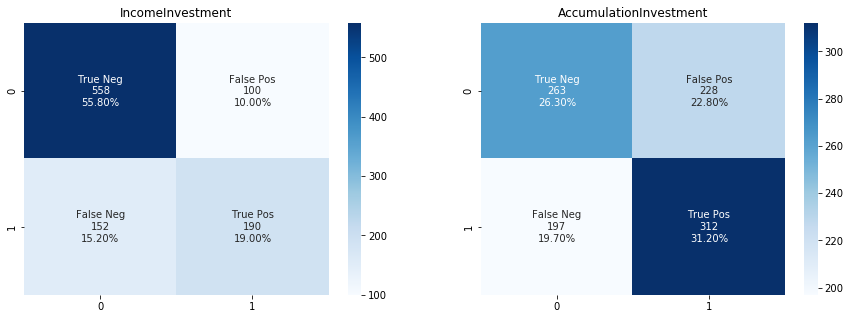

In [9]:
#Valuation of logistic models
confusionMat(predLogInc, predLogAcc, Inc_test, Acc_test)

For the logistic models, the prediction is not so bad for the income prediction but not good for the accumulation prediction.  
For the income prediction, all the metrics seem good except of the sensitivity. For the business point of view we have to increase this metric.  
For the accumulation prediction the prediction is not good enougth. All the metrics is close to a random prediction.

Now, we have a reference to evaluate the other models. Let see how they perform our problem.

#### Random Forest Classifier

Measures for IncomeInvestment:
Sensitivity = 63.45% ;  Specificity = 94.38% ; Precision = 85.43% ; F1 score = 72.82% ; Accuracy = 83.80% ; Zmetric = 8.98% 

Measures for AccumulationInvestment
Sensitivity = 73.87% ;  Specificity = 82.48% ; Precision = 81.39% ; F1 score = 77.45% ; Accuracy = 78.10% ; Zmetric = 11.42% 



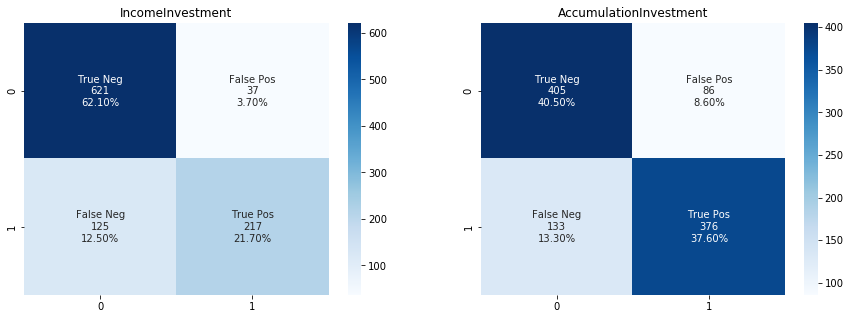

In [10]:
#Valuation of random Forest models
confusionMat(predRFInc, predRFAcc, Inc_test, Acc_test)

Here, the results are very good. It increase all the metric for both targets, especially the sensitivity. The prediction for accumulation is much better.  
As expected, the Random Forest well perform the prediction of our problem.

#### Artificial Neural Network

For the Artificial Neural Network model, we use a validation set in order to select a threshold, wich minimize our z-metric (misclassified rate) for the two models. We found that the optimal threshold is equal to 0.33 for the IncomeInvesstisment target and 0.28 for the AccumulationInvesstisment target. The methodologie that we use can be found in the Annexe notebook.

Measures for IncomeInvestment:
Sensitivity = 61.40% ;  Specificity = 92.10% ; Precision = 80.15% ; F1 score = 69.54% ; Accuracy = 81.60% ; Zmetric = 10.00% 

Measures for AccumulationInvestment
Sensitivity = 72.69% ;  Specificity = 84.73% ; Precision = 83.15% ; F1 score = 77.57% ; Accuracy = 78.60% ; Zmetric = 11.34% 



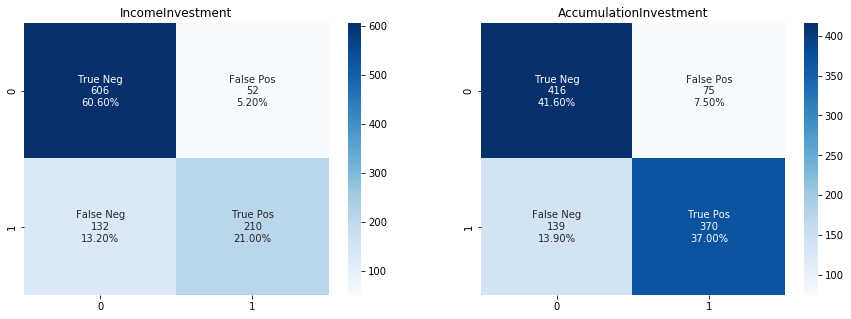

In [11]:
#Valuation of neural Networks models
iPred = (predNnInc > 0.33).astype(int)
aPred = (predNnAcc > 0.28).astype(int)

confusionMat(iPred, aPred, Inc_test, Acc_test)

Neural Networks model is also good for income prediction. For accumulation prediction it is quite similar to the Random Forest but it seems favorise the sensitivity metric.

### Conclusion

As expected, our two models well perform our problem. Compare to the logistic regression, they have very good result.

For the income prediction, the Random Forest as a bit less sensitivity than the Neural Network but all the others metrics are significantly better. Even our metric which penalize False negative prediction is better for this model.

For the accumulation prediction, all the result for the Random Forest and the Neural Network is similar.

We choose to keep as models for the income prediction the Random Forest and for the accumulation prediction the Neural Network. Now, let us understand our prediction by explain our models with interpretability techniques.

In [ ]:
modIncome = rfModInc
modAccumulation = nnAccMod

#Store the model
%store modIncome
%store modAccumulation

#Store the sets
%store X_test
%store Inc_test
%store Acc_test